In [31]:
import imaging_behavior_functions
import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

In [ ]:
base_path = "C:/Users/wilson/OneDrive - Harvard University/Thesis - Wilson lab/2P imaging/preprocessed data/qualified_sessions/one_trial_sessions/"
example_path_data = base_path+"20230805-4_MBON21hDeltaB_syntGCAMP7f_odor_apple_patchy/data/"
example_path_results = base_path+"20230805-4_MBON21hDeltaB_syntGCAMP7f_odor_apple_patchy/results/"
trial_num = 1
odor_threshold = 5
time_interval_threshold = 16  # Assuming time is in seconds or an equivalent unit
k = 8
window_size = 30

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data,trial_num)
behav_df = imaging_behavior_functions.make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor,trial_num,ball_d = 9)
xPos, yPos = imaging_behavior_functions.reconstruct_path(behav_df, ball_d = 9)
roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence = imaging_behavior_functions.get_roi_seq(roi_df)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence)
behav_df, padded_result_df, smoothed_df = odor_behavioral_analysis.analysis_dfs(behav_df, time_interval_threshold, k, window_size)
combined_df = imaging_behavior_functions.combine_df(behav_df, neural_df)
smoothed_df["translationalV_smoothed"] = np.sqrt(smoothed_df["fwV_smoothed"]**2+smoothed_df["sideV_smoothed"]**2)

In [101]:
smoothed_df

,time,fwV,sideV,yawV,heading,abssideV,absyawV,net_motion,net_motion_state,heading_adj,...,yPos,cluster_label_temporal,soft_cluster_label_temporal,cluster_label_spatial,fwV_smoothed,sideV_smoothed,yawV_smoothed,heading_smoothed,straightness_smoothed,translationalV_smoothed
0,0.000000,0.000000,0.000000,0.000000,0.748649,0.000000,0.000000,0.000000,0,0.748649,...,0.000000,0,0,0,-0.108750,-0.883365,0.059913,0.749072,0.750428,0.890034
1,0.240513,-0.219713,-1.306855,0.100094,0.749624,1.306855,0.100094,1.626663,0,0.749624,...,-0.070283,0,0,0,-0.099858,-0.957417,0.074882,0.749577,0.727487,0.962611
2,0.481026,-0.119723,-1.628911,0.059436,0.747587,1.628911,0.059436,1.808070,0,0.747587,...,-0.120858,0,0,0,-0.048625,-1.056604,0.124079,0.751587,0.729715,1.057722
3,0.721539,-0.303351,-2.169633,0.196950,0.750262,2.169633,0.196950,2.669934,0,0.750262,...,-0.222751,0,0,0,0.110787,-1.228274,0.266880,0.758248,0.736050,1.233261
4,0.962052,0.036717,-0.108245,-0.010321,0.751260,0.108245,0.010321,0.155283,0,0.751260,...,-0.215363,0,0,0,0.463820,-1.706959,0.604848,0.776593,0.700775,1.768852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,1799.036986,10.456535,-2.430525,4.156634,5.742618,2.430525,4.156634,17.043694,0,37.158545,...,285.030287,0,0,5,6.681701,-7.481783,2.490296,5.920101,NaN,10.031062
7481,1799.277499,-1.282638,-16.646307,8.714621,5.963540,16.646307,8.714621,26.643566,0,37.379467,...,284.579765,0,0,5,5.981866,-7.410167,2.610321,6.067336,NaN,9.523303
7482,1799.518012,7.348875,-21.653753,11.722968,0.308291,21.653753,11.722968,40.725596,0,38.007403,...,285.793715,0,0,5,5.448869,-6.225567,1.675990,6.204412,NaN,8.273322
7483,1799.758525,4.704347,12.071842,-8.472140,0.411995,12.071842,8.472140,25.248329,0,38.111107,...,287.067115,0,0,5,5.200999,-4.295300,0.056905,0.009931,NaN,6.745369


In [86]:
selected_df = neural_df.drop(columns=['time','MBON21L','MBON21R'])
selected_df

,hDeltaB_0,hDeltaB_1,hDeltaB_2,hDeltaB_3,hDeltaB_4,hDeltaB_5,hDeltaB_6,hDeltaB_7,hDeltaB_8,hDeltaB_9,...,hDeltaB_18,hDeltaB_19,hDeltaB_20,hDeltaB_21,hDeltaB_22,hDeltaB_23,hDeltaB_24,hDeltaB_25,hDeltaB_26,hDeltaB_27
0,1.241962,0.383523,0.358444,0.097757,0.011519,0.277770,0.061169,0.180628,0.311270,0.599994,...,1.916588,2.185271,1.999191,2.162483,1.916930,1.971367,1.724920,1.422568,1.198348,1.322129
1,1.122885,0.373910,0.261601,0.186200,0.079669,0.205932,0.085467,0.182624,0.304660,0.592972,...,1.910222,2.245278,2.006683,2.076988,1.878382,2.054740,1.769468,1.327635,1.199988,1.461048
2,1.138844,0.295217,0.133648,0.338941,0.132484,0.163215,0.189639,0.194816,0.350617,0.619992,...,1.882963,2.262364,2.080175,2.052068,1.858321,2.050991,1.830000,1.274174,1.266786,1.564603
3,1.136710,0.232473,0.008637,0.368918,0.121838,0.228631,0.317409,0.236150,0.437271,0.772920,...,1.810834,2.287551,2.155690,2.116092,1.876195,1.937832,1.814542,1.178010,1.355249,1.511653
4,0.784412,0.284925,-0.013781,0.299948,0.062412,0.358765,0.385596,0.301791,0.538747,0.966230,...,1.811607,2.245671,2.199512,2.166246,1.901164,1.879810,1.712413,1.057092,1.345140,1.334321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,0.220035,-0.130434,0.015037,-0.042719,-0.123742,-0.077967,0.034825,0.105906,0.426064,1.007740,...,2.678864,2.692949,2.204068,1.894932,1.306142,1.125682,0.694187,0.191132,0.156214,0.164683
7481,0.021527,-0.090348,-0.056911,-0.082641,-0.201801,-0.158782,0.034147,0.036600,0.351182,0.793700,...,2.808143,2.674942,2.417434,2.100247,1.446980,1.464223,0.892807,0.474159,0.244738,0.307505
7482,-0.275158,-0.050738,-0.134345,-0.031096,-0.246961,-0.211673,-0.003561,-0.011629,0.321332,0.716781,...,2.950979,2.660348,2.594776,2.300975,1.788475,1.732115,1.079645,0.681985,0.223644,0.445096
7483,-0.411082,-0.063065,-0.065458,0.032444,-0.249648,-0.194095,-0.061058,-0.058695,0.235592,0.660515,...,2.937907,2.721088,2.683954,2.458006,2.080824,1.906719,1.199272,0.745784,0.225406,0.542416


In [87]:
def perform_pca(selected_df, n_components=3):
    """
    Perform PCA on the given dataframe.

    Args:
    - data (pd.DataFrame): The dataframe containing neuron activity data.
    - n_components (int): The number of principal components to compute.

    Returns:
    - pca (PCA object): The PCA object after fitting the data.
    - transformed_data (np.array): Data transformed into principal components.
    - explained_variance_ratio (np.array): The amount of variance explained by each of the selected components.
    """
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_df)

    # Perform PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_

    return pca, transformed_data, explained_variance_ratio
pca, transformed_data, explained_variance_ratio = perform_pca(selected_df,n_components=3)

In [88]:
roi_kw = 'hDeltaB'
roi_mtx = imaging_behavior_functions.extract_heatmap(neural_df, roi_kw, 1, example_path_results, trial_num)
param_df = imaging_behavior_functions.fit_sinusoid(neural_df,roi_mtx)
param_df

,time,phase,baseline,amplitude,phase_error,baseline_error,amplitude_error
0,0.000000,4.188790,0.115561,1.478587,0.064717,0.068432,0.097852
1,0.240513,4.188790,0.165476,1.517075,0.067541,0.073189,0.104534
2,0.481026,4.188790,0.213279,1.513413,0.074924,0.080917,0.115467
3,0.721539,4.188790,0.242901,1.486588,0.081122,0.085901,0.122365
4,0.962052,3.956080,0.242280,1.480633,0.077250,0.081279,0.115510
...,...,...,...,...,...,...,...
7480,1799.036986,3.723369,0.085306,2.184039,0.036784,0.056443,0.079304
7481,1799.277499,3.723369,0.120576,2.211595,0.031433,0.049006,0.069093
7482,1799.518012,3.956080,0.195965,2.311278,0.034028,0.055570,0.078528
7483,1799.758525,3.956080,0.283633,2.411280,0.041650,0.071020,0.100446


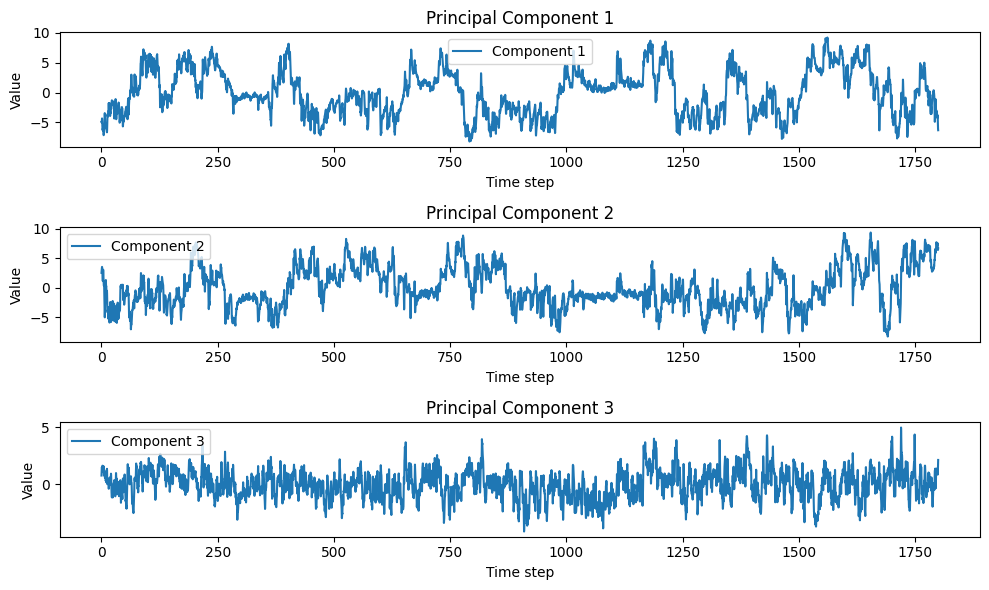

In [89]:
# visualze top PCstime_steps = range(transformed_data.shape[0])

n_components = 3
time_steps = range(transformed_data.shape[0])

# Create a figure with subplots
fig, axes = plt.subplots(n_components, 1, figsize=(10, 2*n_components))

for i in range(n_components):
    ax = axes[i]
    ax.plot(neural_df.time, transformed_data[:, i], label=f'Component {i+1}')
    ax.set_title(f'Principal Component {i+1}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

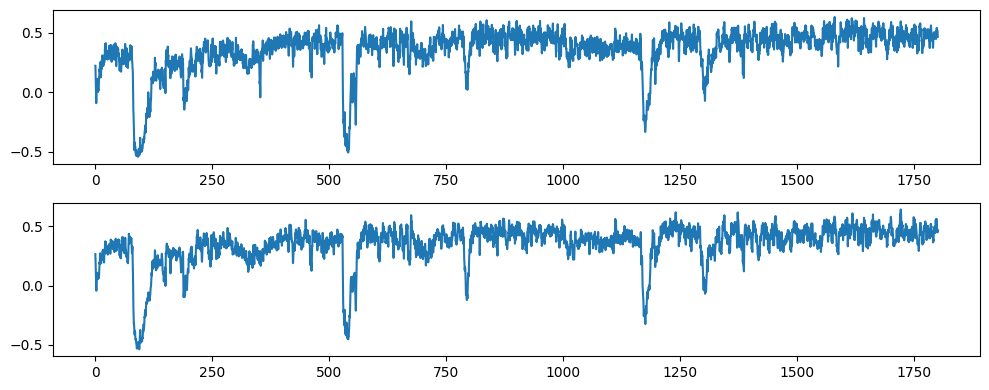

In [95]:
fig, axes = plt.subplots(2, 1, figsize=(10, 4))

axes[0].plot(neural_df.time,neural_df.MBON21L)
axes[1].plot(neural_df.time,neural_df.MBON21R)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [135]:
neural_df['mean_MBON21'] = 0.5*(neural_df['MBON21L']+neural_df['MBON21R'])
neural_df['smoothed_MBON21'] = imaging_behavior_functions.apply_gaussian_smoothing(neural_df['mean_MBON21'],5)
MBON21_diff = np.diff(neural_df.smoothed_MBON21)
#plt.hist(MBON21_diff,bins=30)
# Determine the threshold for big drops (95th percentile)
threshold_low = np.percentile(MBON21_diff, 1)
threshold_high = np.percentile(MBON21_diff, 99)
# Identify indices where big drops occur
big_drop_indices = np.where(MBON21_diff <= threshold_low)[0]
big_increase_indices = np.where(MBON21_diff >= threshold_high)[0]

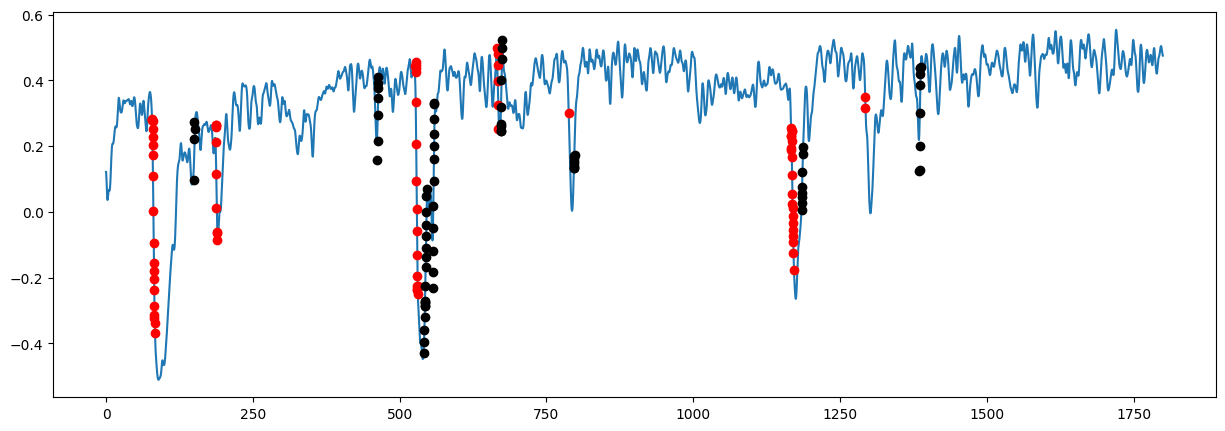

In [136]:
plt.figure(figsize=(15, 5))
plt.plot(neural_df.time, neural_df.smoothed_MBON21, label='Color Variable', zorder=1)
#plt.plot(neural_df.time[:-1], MBON21_diff)
# Highlighting the big drop indices in red
plt.scatter(neural_df.time[big_drop_indices], neural_df.mean_MBON21[big_drop_indices], color='red', label='Big Drops', zorder=2)
plt.scatter(neural_df.time[big_increase_indices], neural_df.mean_MBON21[big_increase_indices], color='black', label='Big Increases', zorder=2)


In [131]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
phase = np.array(param_df.phase)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=phase[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Phase'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [132]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
amplitude = np.array(param_df.amplitude)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=amplitude[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Amplitude'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [138]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
baseline = np.array(param_df.baseline)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=4,
        color=baseline[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Baseline'),
        opacity=0.5
    )
)])

'''for idx in big_drop_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='red', width=2)))

for idx in big_increase_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='black', width=2)))'''    
# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [140]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
#color_var = neural_df.time

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=color_var[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Baseline'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [65]:
padded_result_df.head(1)

,Curvature_Mean,Curvature_Std,Tight_Turns,Moderate_Turns,Wide_Turns,Heading_Variance,Mean_fwV_sideV_Ratio,Yaw_Velocity_Mean,Yaw_Velocity_Std
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


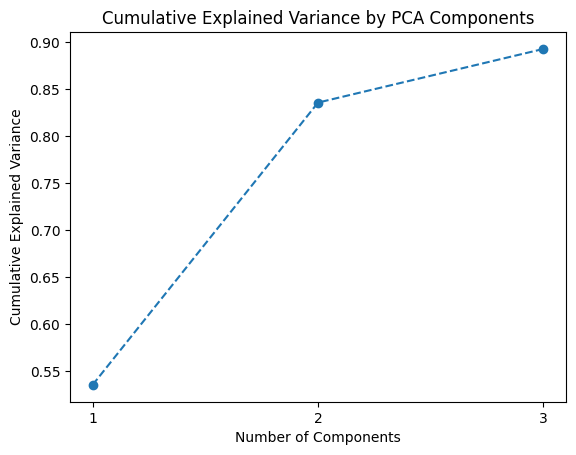

In [77]:
plt.plot(range(1, 4), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xticks(range(1, 4))
plt.show()